# Chapter 5 - 행렬, 파트2: 행렬의 확장 개념

In [1]:
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

## 5-3. 대각합 연산과 유클리드 공식 동일하다는 것 구현

In [2]:
# A = np.arange(4).reshape(2, 2)
# 1부터 10까지 정수 중 랜덤하게 추출하여 2*2 행렬 생성
A = np.random.randint(1, 10, (2, 2))
A

array([[4, 1],
       [6, 3]])

In [3]:
# 프로베니우스 노름 (=유클리드 공식의 결과)
frobenius = np.linalg.norm(A)
frobenius

7.874007874011811

In [4]:
# A의 전치 행렬 구한다
aTa = np.dot(A, A)

# 전치행렬의 대각합 (trace) 구해서 루트 씌운다
np.sqrt(np.trace(aTa))

6.082762530298219

In [5]:
# l2 norm과 전치행렬의 대각합에 루트 씌운 것 동일한지 확인
frobenius == np.sqrt(np.trace(aTa))

False

## 5-4. 행렬 이동이 행렬 노름에 미치는 영향 알아본다
1. 10*10 난수 행렬 만들고 프로베니우스 노름 계산
2. for 문 내부에 다음 단계 코딩
    1. 노름의 일부 만큼 행렬 이동
        - 이동시킬 값인 노름의 비율은 0 ~ 1 사이를 30계의 단계로 나누어 진행
        - 루프의 각 반복에서는 이전 반복에서 이동된 행렬이 아닌 원래 행렬을 사용
    2. 원래 행렬에서 노름의 변화율 계산
    3. 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리 계산
    4. 행렬의 원소 사이의 상관계수 계산
        - `np.flatten()` 사용해서 벡터화된 행렬의 상관관계 계산


In [6]:
# 10*10 난수 행렬 생성
matrix = np.random.randn(10, 10)
frobenius = np.linalg.norm(matrix)

print("행렬 크기 :", matrix.shape)
print("프로베니우스 노름 :", frobenius)

행렬 크기 : (10, 10)
프로베니우스 노름 : 11.096910733104115


In [11]:
def translate_change_rate_corrcoeff(matrix, rates_num=30):

    # 이동시킬 값인 노름의 비율
    rates = np.linspace(0, 1, num=rates_num)
    
    # 변화율, 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리, 행렬의 원소 사이의 상관계수 담을 리스트 생성
    change_rate_list = []
    frobenius_between_list = []
    corrcoef_list = []

    # 노름의 일부 만큼 행렬을 이동
    for rate in rates:
        # 노름의 일부 : frobenius * rate
        translated = matrix + ((frobenius * rate) * np.eye(10))
        
        # 원래 행렬에서 노름의 변화율 계산
        change_rate = ((np.linalg.norm(translated) - frobenius) / frobenius) * 100

        # 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리를 계산
        frobenius_between = np.linalg.norm(matrix - translated)

        # 행렬의 원소 사이의 상관계수 계산
        corrcoef = np.corrcoef(matrix.flatten(), translated.flatten())[0, 1]

        change_rate_list.append(change_rate)
        frobenius_between_list.append(frobenius_between)
        corrcoef_list.append(corrcoef)
    
    # 그래프에 사용할 데이터와 y축 레이블
    data_lists = [change_rate_list, corrcoef_list, frobenius_between_list]
    y_labels = ["노름 변화율(%)", "원래 행렬과의 상관 계수", "프로베니우스 거리"]

    # 1*3 크기의 subplots 생성
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))

    # for loop를 이용하여 각 subplot에 그래프 생성
    for i, ax in enumerate(axs):
        ax.plot(rates, data_lists[i], marker="s", color="r", markersize=3)
        ax.set_xlabel("이동(노름 비율)")
        ax.set_ylabel(y_labels[i])

    plt.tight_layout()
    plt.show()

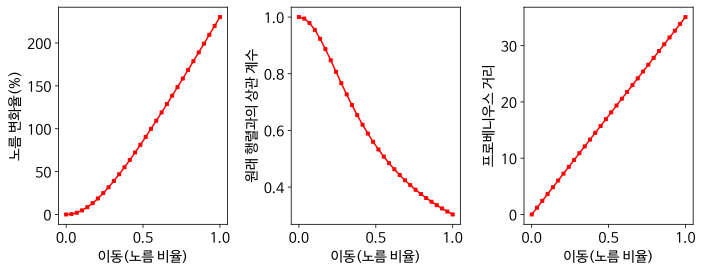

In [12]:
translate_change_rate_corrcoeff(matrix)

## 5-5. 계수가 r인 행렬을 만들려면 난수 M * r 행렬에 r * N 행렬을 곱하는지 구현하고 계수가 실제로 r인지 확인

In [21]:
# 임의의 숫자 M, N 생성
M = np.random.randint(1, 5)
N = np.random.randint(1, 5)

print("M :", M)
print("N :", N)

M : 4
N : 2


In [25]:
# 행렬의 최대로 가능한 계수 r = min{M, N}
r = min(M, N)
print("r :", r)

r : 2


In [26]:
# 난수 M * r 행렬 생성
Mxr = np.random.randn(M, r)

# 난수 r * M 행렬 생성
rxM = np.random.randn(r, N)

In [30]:
# 난수 M * r 행렬에 난수 r * M 행렬을 곱함
MxN = np.dot(Mxr, rxM)
MxN

array([[-1.35440938,  0.02422331],
       [ 1.52721181, -0.09721994],
       [-0.02639362,  0.03961988],
       [-0.23623815, -0.06768297]])

In [32]:
# MxN 행렬의 계수가 실제로 r인지 확인
r == np.linalg.matrix_rank(MxN)

True

In [43]:
# 만약 r > min{M, N}이라면?
r_edited = r + 2
print("min{M, N}보다 큰 r 값 :", r_edited)

min{M, N}보다 큰 r 값 : 4


In [44]:
# 난수 M * r_edited 행렬 생성
Mxr_edited = np.random.randn(M, r_edited)

# 난수 r_edited * M 행렬 생성
r_edited_xM = np.random.randn(r_edited, N)

In [45]:
MxN_edited = np.dot(Mxr_edited, r_edited_xM)
MxN_edited

array([[ 2.86363237, -0.02428631],
       [-2.20996502,  0.95187647],
       [-2.08437963, -1.54425358],
       [ 0.47359854,  0.23071516]])

In [48]:
# r_edited (r+2)를 넣어서 행렬을 생성하고 rank를 확인했는데 r과 똑같다? (문제가 있다)
r == np.linalg.matrix_rank(MxN_edited)

True